In [54]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

# Graph Force/Strain

### Dimensions

In [55]:
Lext = 200e-3
Lin = 126.8e-3
a = (Lext-Lin)/2
steel = {'w':50.05e-3,'h': 10.19e-3}
Al = {'w':50.07e-3,'h': 5.02e-3}
Cu = {'w':50.10e-3,'h': 8.12e-3}
Comp = {'w':53.37e-3,'h': 4.54e-3}

dU = 1
e = 949.3e-6
S = dU/e
print(S)

steel['I'] = steel['w']*steel['h']**3/12
Al['I'] = Al['w']*Al['h']**3/12
Cu['I'] = Cu['w']*Cu['h']**3/12
Comp['I'] = Comp['w']*Comp['h']**3/12

1053.4077741493732


### Bending test data

In [56]:
def decode(a):
    b=a
    if a[0] == '-':
        base = -(int(b[1])+int(b[3])/10+int(b[4])/100)
        b = b[1:]
    else:
        base = int(b[0])+int(b[2])/10+int(b[3])/100
    exp=0
    if b[5]=='-':
        exp = -(int(b[6])*10+ int(b[7]))
    elif b[5]=='+':
        exp = int(b[6])*10+ int(b[7])
    return base*10**(exp)

def average(arr):
    it = 0
    moy = 0
    l = int(len(arr)*.05)
    ar = np.sort(arr)[l:len(arr)-l]
    for i in range(len(ar)):
        if ar[i]!=0:
            moy += ar[i]
            it += 1
    return moy/it

In [57]:
data_steel = np.loadtxt('Steel.txt',skiprows=3,delimiter=';',usecols=(0,1,2),max_rows=3307,dtype=str) 
data_Al = np.loadtxt('Aluminium.txt',skiprows=3,delimiter=';',usecols=(0,1,2),max_rows=1040,dtype=str)
data_Cu = np.loadtxt('Copper.txt',skiprows=3,delimiter=';',usecols=(0,1,2),max_rows=1105,dtype=str)
data_Comp = np.loadtxt('Composite.txt',skiprows=3,delimiter=';',usecols=(0,1,2),max_rows=591,dtype=str)

In [58]:
steel['data'] = np.zeros_like(data_steel,dtype=float)
Al['data'] = np.zeros_like(data_Al,dtype=float)
Cu['data'] = np.zeros_like(data_Cu,dtype=float)
Comp['data'] = np.zeros_like(data_Comp,dtype=float)
steel['E'] = np.zeros(2)
Al['E'] = np.zeros(2)
Cu['E'] = np.zeros(2)
Comp['E'] = np.zeros(2)

E1_steel = np.zeros(len(steel['data']))
E1_Al = np.zeros(len(Al['data']))
E1_Cu = np.zeros(len(Cu['data']))
E1_Comp = np.zeros(len(Comp['data']))


for i in range(len(steel['data'])):
    for j in range(len(steel['data'][0])):
        steel['data'][i,j] = decode(data_steel[i,j])
    if steel['data'][i,0] != 0:
        E1_steel[i] = steel['data'][i,2]*Lext**3/(48*steel['I']*steel['data'][i,0]*10**(-3))*(3*a/Lext-4*a**3/(Lext**3))
steel['E'][0] = average(E1_steel)

for i in range(len(Al['data'])):
    for j in range(len(Al['data'][0])):
        Al['data'][i,j] = decode(data_Al[i,j])
    if Al['data'][i,0] != 0:
        E1_Al[i] = Al['data'][i,2]*Lext**3/(48*Al['I']*Al['data'][i,0]*10**(-3))*(3*a/Lext-4*(a/Lext)**3)   
Al['E'][0] = average(E1_Al)

for i in range(len(Cu['data'])):
    for j in range(len(Cu['data'][0])):
        Cu['data'][i,j] = decode(data_Cu[i,j])
    if Cu['data'][i,0] != 0:
        E1_Cu[i] = Cu['data'][i,2]*Lext**3/(48*Cu['I']*Cu['data'][i,0]*10**(-3))*(3*a/Lext-4*(a/Lext)**3)
        
Cu['E'][0] = average(E1_Cu)

for i in range(len(Comp['data'])):
    for j in range(len(Comp['data'][0])):
        Comp['data'][i,j] = decode(data_Comp[i,j])
    if Comp['data'][i,0] != 0:
        E1_Comp[i] = Comp['data'][i,2]*Lext**3/(48*Comp['I']*Comp['data'][i,0]*10**(-3))*(3*a/Lext-4*(a/Lext)**3)
Comp['E'][0] = average(E1_Comp)

print('Steel : {:.3e}'.format(steel['E'][0]))
print('Al : {:.3e}'.format(Al['E'][0]))
print('Cu : {:.3e}'.format(Cu['E'][0]))
print('Comp : {:.3e}'.format(Comp['E'][0]))


Steel : 2.040e+11
Al : 7.723e+10
Cu : 1.164e+11
Comp : 6.094e+10


In [65]:
steel['e'] = np.zeros(len(steel['data']))
Al['e'] = np.zeros(len(Al['data']))
Cu['e'] = np.zeros(len(Cu['data']))
Comp['e'] = np.zeros(len(Comp['data']))
steel['smax'] = np.zeros(len(steel['data']))
Al['smax'] = np.zeros(len(Al['data']))
Cu['smax'] = np.zeros(len(Cu['data']))
Comp['smax'] = np.zeros(len(Comp['data']))

E2_steel = np.zeros(len(steel['data']))
E2_Al = np.zeros(len(Al['data']))
E2_Cu = np.zeros(len(Cu['data']))
E2_Comp = np.zeros(len(Comp['data']))

for i in range(len(steel['data'])):
    steel['e'][i] = -steel['data'][i,1]/S
    steel['smax'][i] = 3*steel['data'][i,2]*a/(steel['w']*steel['h']**2)
    if steel['e'][i]!=0:
        E2_steel[i] = steel['smax'][i]/steel['e'][i]
    
steel['E'][1] = average(E2_steel)

for i in range(len(Al['data'])):
    Al['e'][i] = -Al['data'][i,1]/S
    Al['smax'][i] = 3*Al['data'][i,2]*a/(Al['w']*Al['h']**2)
    if Al['e'][i]!=0:
        E2_Al[i] = Al['smax'][i]/Al['e'][i]
Al['E'][1] = average(E2_Al)

for i in range(len(Cu['data'])):
    Cu['e'][i] = -Cu['data'][i,1]/S
    Cu['smax'][i] = 3*Cu['data'][i,2]*a/(Cu['w']*Cu['h']**2)
    if Cu['e'][i]!=0:
        E2_Cu[i] = Cu['smax'][i]/Cu['e'][i]
        
Cu['E'][1] = average(E2_Cu)

for i in range(len(Comp['data'])):
    Comp['e'][i] = -Comp['data'][i,1]/S
    Comp['smax'][i] = 3*Comp['data'][i,2]*a/(Comp['w']*Comp['h']**2)
    if Comp['e'][i]!=0:
        E2_Comp[i] = Comp['smax'][i]/Comp['e'][i]
Comp['E'][1] = average(E2_Comp)

print('Steel : {:.3e}'.format(steel['E'][1]))
print('Al : {:.3e}'.format(Al['E'][1]))
print('Cu : {:.3e}'.format(Cu['E'][1]))
print('Comp : {:.3e}'.format(Comp['E'][1]))

Steel : 2.103e+11
Al : 6.822e+10
Cu : 1.165e+11
Comp : 5.650e+10


In [32]:
E1_steel = 210e9
E1_Al = 62e9
E1_Cu = 128e9

var_steel = (steel['E'] - E1_steel)/E1_steel
var_Al = (Al['E'] - E1_Al)/E1_Al
var_Cu = (Cu['E'] - E1_Cu)/E1_Cu

print(var_steel)
print(var_Al)
print(var_Cu)


-0.028697583560402133
0.24565680866132725
-0.09056431451338112


## Plot

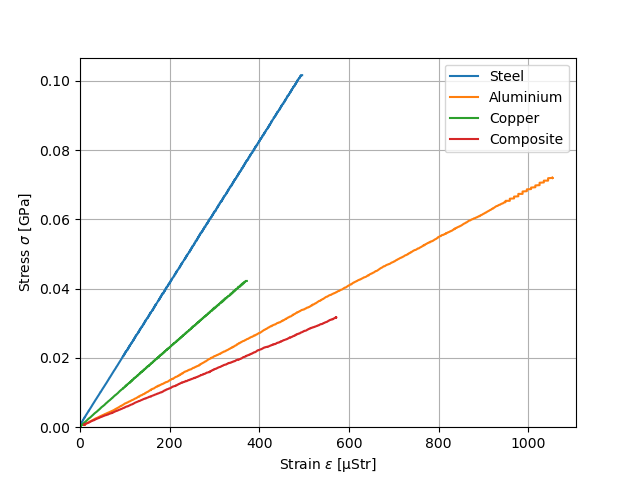

In [64]:
fig = plt.figure()
ax = fig.gca()
ax.plot(steel['e']*10**6,steel['smax']/10**9,label='Steel')
ax.plot(Al['e']*10**6,Al['smax']/10**9,label='Aluminium')
ax.plot(Cu['e']*10**6,Cu['smax']/10**9,label='Copper')
ax.plot(Comp['e']*10**6,Comp['smax']/10**9,label='Composite')

ax.legend()
ax.grid()
ax.set_xlabel('Strain $\epsilon$ [μStr]')
ax.set_ylabel('Stress $\sigma$ [GPa]')
ax.set_xlim(0)
ax.set_ylim(0)
plt.show()







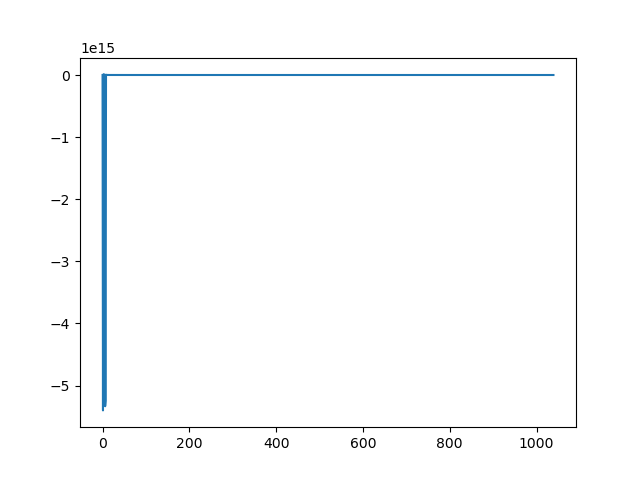

In [25]:
fig = plt.figure()
ax = fig.gca()
ax.plot(np.arange(len(E1_Al)),E1_Al)

# ax.plot(Al['data'][:,0],Al['data'][:,2])
plt.show()